In [27]:
import glob, os
from astropy.io import ascii
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table, vstack
import matplotlib as mpl
from astropy import units as u
import time

In [28]:
import matplotlib as mpl
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"

mpl.rcParams["axes.titlesize"] = 14
mpl.rcParams["axes.labelsize"] = 20
plt.rcParams['savefig.dpi'] = 200
plt.rc('font', family='serif')

In [29]:
obs = 'BOAO'
# date = '20221018'
# date = '20221019'
# date = '20221020'
date = '20221022'
# folder = 'GRB221009A_1018'
# folder = 'GRB221009A_1019'

In [31]:
objimlist = sorted(glob.glob(f'../5.result/Calib*{date}*0.fits'))
mobjimlist = sorted(glob.glob(f'../5.result/Calib*{date}*mask.fits'))
bkgimlist = sorted(glob.glob(f'../5.result/Calib*{date}*bkg.fits'))
print(f"{len(objimlist)} Object images")
print(f"{len(mobjimlist)} Mask images")
print(f"{len(bkgimlist)} Bkg images")

28 Object images
0 Mask images
28 Bkg images


In [32]:
nn = 0
#	Dithering number
step = 7
partlist = objimlist[nn:step*(nn+1)]
partlist

['../5.result/Calib-BOAO-GRB221009A-20221022-092004-Ks-60.fits',
 '../5.result/Calib-BOAO-GRB221009A-20221022-092122-Ks-60.fits',
 '../5.result/Calib-BOAO-GRB221009A-20221022-092238-Ks-60.fits',
 '../5.result/Calib-BOAO-GRB221009A-20221022-092355-Ks-60.fits',
 '../5.result/Calib-BOAO-GRB221009A-20221022-092514-Ks-60.fits',
 '../5.result/Calib-BOAO-GRB221009A-20221022-092629-Ks-60.fits',
 '../5.result/Calib-BOAO-GRB221009A-20221022-092746-Ks-60.fits']

In [33]:
ii = 0
sciim = partlist[ii]
skyimlist = [inim.replace('fits', 'mask.fits') for ii, inim in enumerate(partlist) if ii != 0]
bkgimlist = [inim.replace('fits', 'bkg.fits') for ii, inim in enumerate(partlist) if ii != 0]

print(f"#\tSci image : {os.path.basename(sciim)}")
print(f"#\tImages for the sky")
for inim in skyimlist: print(os.path.basename(inim))

#	Sci image : Calib-BOAO-GRB221009A-20221022-092004-Ks-60.fits
#	Images for the sky
Calib-BOAO-GRB221009A-20221022-092122-Ks-60.mask.fits
Calib-BOAO-GRB221009A-20221022-092238-Ks-60.mask.fits
Calib-BOAO-GRB221009A-20221022-092355-Ks-60.mask.fits
Calib-BOAO-GRB221009A-20221022-092514-Ks-60.mask.fits
Calib-BOAO-GRB221009A-20221022-092629-Ks-60.mask.fits
Calib-BOAO-GRB221009A-20221022-092746-Ks-60.mask.fits


In [10]:
mskdatalist = []
for mskim in skyimlist:
	mskdata = fits.getdata(mskim)
	bkgdata = fits.getdata(mskim.replace('mask', 'bkg'))
	indx_zero = np.where(mskdata==0)
	mskdata[indx_zero] = bkgdata[indx_zero]
	mskdatalist.append(mskdata)


FileNotFoundError: [Errno 2] No such file or directory: '../5.result/Calib-BOAO-GRB221009A-20221022-092122-Ks-60.mask.fits'

In [11]:
skyim = np.median(mskdatalist, axis=0)
fits.writeto(f"../5.result/{sciim.replace('fits', 'sky.fits')}", skyim, overwrite=True)
skymed = np.median(skyim.flatten())

/Users/paek/opt/miniconda3/envs/kn/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/paek/opt/miniconda3/envs/kn/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


KeyError: 'Data must be a numpy array.'

NameError: name 'skymed' is not defined

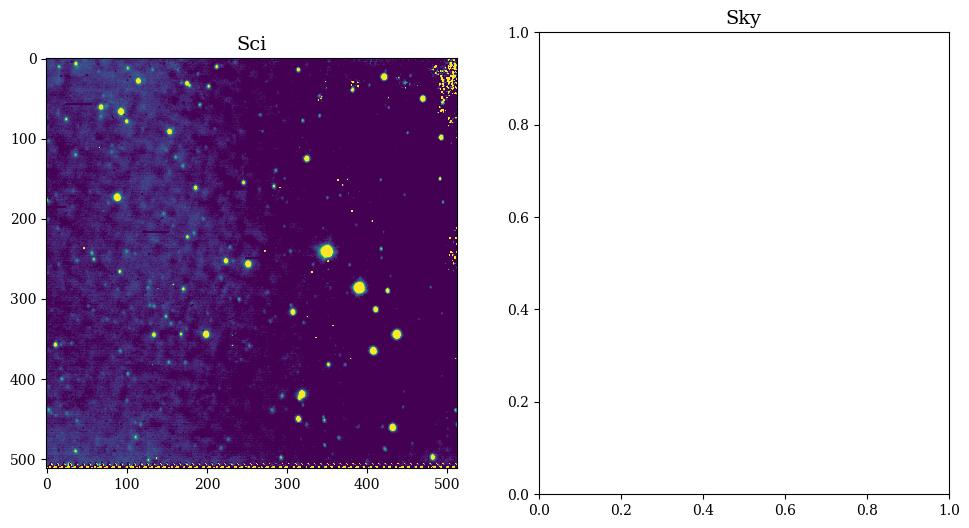

In [12]:
data, hdr = fits.getdata(sciim, header=True)
nsciim = sciim.replace('fits', 'skysub.fits')

plt.close('all')
fig = plt.figure(figsize=(18, 6))

plt.subplot(131)
plt.title('Sci')
bkg = np.median(data.flatten())
plt.imshow(data, vmin=bkg, vmax=bkg*1.1)

plt.subplot(132)
plt.title('Sky')
plt.imshow(skyim, vmin=skymed, vmax=skymed*10)

plt.subplot(133)
plt.title('Sky Subt')
subim = data-skyim
submed = np.median(subim.flatten())
plt.imshow(subim, vmin=submed, vmax=submed*1.1)

fits.writeto(nsciim, data=subim, header=hdr, overwrite=True)
plt.savefig(f"../5.result/{os.path.basename(ninim).replace('fits', 'png')}",)

# Iteration

#	Sci image : Calib-BOAO-GRB221009A-20221020-092229-Ks-60.fits
#	Images for the sky
Calib-BOAO-GRB221009A-20221020-092345-Ks-60.mask.fits
Calib-BOAO-GRB221009A-20221020-092500-Ks-60.mask.fits
Calib-BOAO-GRB221009A-20221020-092617-Ks-60.mask.fits
Calib-BOAO-GRB221009A-20221020-092734-Ks-60.mask.fits
Calib-BOAO-GRB221009A-20221020-092854-Ks-60.mask.fits
Calib-BOAO-GRB221009A-20221020-093011-Ks-60.mask.fits
#	Sci image : Calib-BOAO-GRB221009A-20221020-092345-Ks-60.fits
#	Images for the sky
Calib-BOAO-GRB221009A-20221020-092229-Ks-60.mask.fits
Calib-BOAO-GRB221009A-20221020-092500-Ks-60.mask.fits
Calib-BOAO-GRB221009A-20221020-092617-Ks-60.mask.fits
Calib-BOAO-GRB221009A-20221020-092734-Ks-60.mask.fits
Calib-BOAO-GRB221009A-20221020-092854-Ks-60.mask.fits
Calib-BOAO-GRB221009A-20221020-093011-Ks-60.mask.fits
#	Sci image : Calib-BOAO-GRB221009A-20221020-092500-Ks-60.fits
#	Images for the sky
Calib-BOAO-GRB221009A-20221020-092229-Ks-60.mask.fits
Calib-BOAO-GRB221009A-20221020-092345-Ks-60.ma

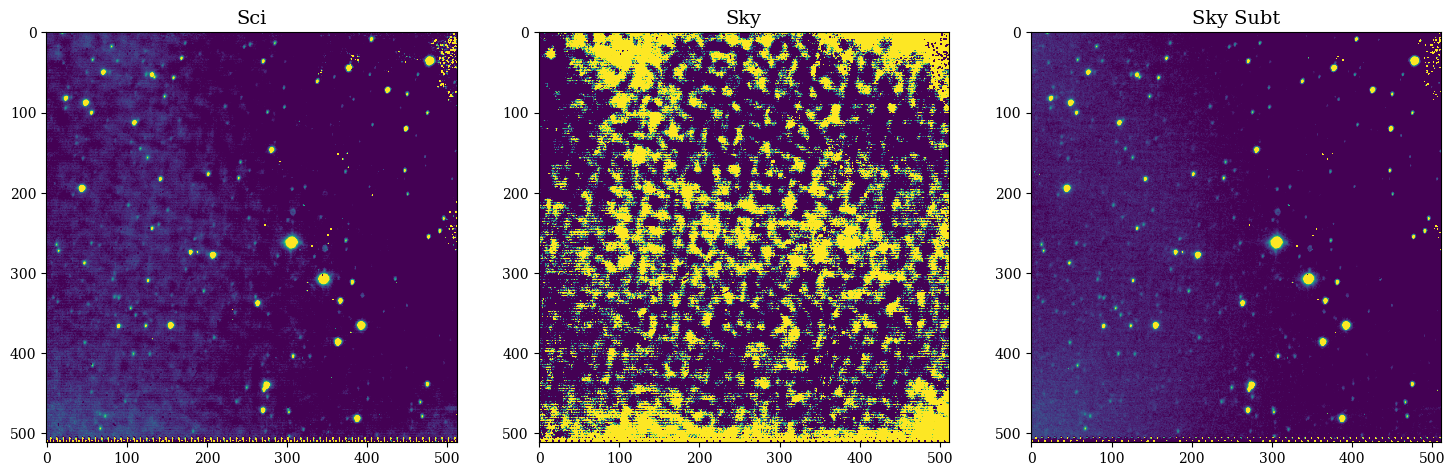

In [82]:
step = 7
#	Dithering number
nn = 0
for nn in range(int(len(objimlist)/step)):
	partlist = objimlist[step*nn:step*(nn+1)]

	for ii, sciim in enumerate(partlist):
		skyimlist = [inim.replace('fits', 'mask.fits') for inim in partlist if inim != sciim]
		print(f"#\tSci image : {os.path.basename(sciim)}")
		print(f"#\tImages for the sky")
		for inim in skyimlist: print(os.path.basename(inim))
		
		mskdatalist = []
		for mskim in skyimlist:
			mskdata = fits.getdata(mskim)
			bkgdata = fits.getdata(mskim.replace('mask', 'bkg'))
			indx_zero = np.where(mskdata==0)
			mskdata[indx_zero] = bkgdata[indx_zero]
			mskdatalist.append(mskdata)

		skyim = np.median(mskdatalist, axis=0)
		fits.writeto(f"../5.result/{sciim.replace('fits', 'sky.fits')}", skyim, overwrite=True)
		skymed = np.median(skyim.flatten())
		
		data, hdr = fits.getdata(sciim, header=True)
		nsciim = sciim.replace('fits', 'skysub.fits')

		plt.close('all')
		fig = plt.figure(figsize=(18, 6))

		plt.subplot(131)
		plt.title('Sci')
		bkg = np.median(data.flatten())
		plt.imshow(data, vmin=bkg, vmax=bkg*1.1)

		plt.subplot(132)
		plt.title('Sky')
		plt.imshow(skyim, vmin=skymed, vmax=skymed*10)

		plt.subplot(133)
		plt.title('Sky Subt')
		subim = data-skyim
		submed = np.median(subim.flatten())
		plt.imshow(subim, vmin=submed, vmax=submed*1.1)

		fits.writeto(nsciim, data=subim, header=hdr, overwrite=True)
		plt.savefig(f"../5.result/{os.path.basename(ninim).replace('fits', 'png')}",)